# Example of how to use the benchmark module

## imports

In [1]:
# reading data
from lclpy.io.tsplib import read_tsplib

# termination criterion
from lclpy.termination.max_seconds_termination_criterion import MaxSecondsTerminationCriterion

# move functions
from lclpy.localsearch.move.tsp_array_swap import TspArraySwap
from lclpy.localsearch.move.array_reverse_order import ArrayReverseOrder

# evaluation function
from lclpy.evaluation.tsp_evaluation_function import TspEvaluationFunction

# Problem class
from lclpy.problem.array_problem import ArrayProblem

# simulated annealing
from lclpy.localsearch.simulatedannealing.simulated_annealing import SimulatedAnnealing
from lclpy.localsearch.simulatedannealing.geometric_cooling_function import GeometricCoolingFunction
from lclpy.localsearch.simulatedannealing.cnst_iterations_temp_function import CnstIterationsTempFunction

# steepest descent
from lclpy.localsearch.steepestdescent.steepest_descent import SteepestDescent

# benchmark
from lclpy.benchmark.benchmark import benchmark
# benchmark statistics
import lclpy.benchmark.statistics as stat 
# note the "as stat", 
# python already has a package named "statistics" in it's standard library, 
# because of this it's better to import the package under a different name than statistics

# plotting
from lclpy.plot.plot import plot
from lclpy.plot.plot import plot_single_stat
import numpy


## Read data

In [2]:
distance_matrix=numpy.loadtxt('data/distanceMatrix',dtype=int)

size = distance_matrix.shape[0]

## Benchmark

### Init

In [3]:
# init termination criterion

termination_criterion = MaxSecondsTerminationCriterion(5)

In [4]:
# init solutions

move_1 = TspArraySwap(size)

evaluation_1 = TspEvaluationFunction(distance_matrix, move_1)

problem_1 = ArrayProblem(evaluation_1, move_1, size)



move_2 = ArrayReverseOrder(size)

evaluation_2 = TspEvaluationFunction(distance_matrix, move_2)

problem_2 = ArrayProblem(evaluation_2, move_2, size)

# make tuple of Problems

problem_tuple = (problem_1,problem_2)

In [5]:
# init algorithms
#
# Note that there is no Problem or termination criterion given to the algorithms,
# this isn't needed, benchmark will always set the Problem and Termination criterion.
#
# The parameter benchmarking must be True for all algorithms.

cooling_func = GeometricCoolingFunction(0.95)
i_for_temp = CnstIterationsTempFunction(1500)

algorithm_1 = SimulatedAnnealing(None, None,cooling_func, i_for_temp, benchmarking=True)


algorithm_2 = SteepestDescent(None, benchmarking=True)

# make tuple of algorithms

alg_tuple = (algorithm_1,algorithm_2)

### Run benchmark

In [6]:
# performs 3 runs of every Problem-algorithm pair

result=benchmark(problem_tuple, alg_tuple, termination_criterion, 2) 

____Benchmark started___
|---  Starting runs for algorithm 0
--|---  Starting runs for problem 0
----|---  Starting run for seed 0
Improvement : 154412
Improvement : 154028
Improvement : 152141
Improvement : 149738
Improvement : 148722
Improvement : 145272
Improvement : 143923
Improvement : 142711
Improvement : 140196
Improvement : 129464
Improvement : 128976
Improvement : 127758
Improvement : 126715
Improvement : 126449
Improvement : 125167
Improvement : 124398
Improvement : 123591
Improvement : 123073
Improvement : 122887
Improvement : 120424
Improvement : 120407
Improvement : 116573
Improvement : 116253
Improvement : 114651
Improvement : 111993
Improvement : 111288
Improvement : 109396
Improvement : 107689
Improvement : 105713
Improvement : 103996
Improvement : 102313
Improvement : 101340
Improvement : 100955
Improvement : 100237
Improvement : 100057
Improvement : 98355
Improvement : 94734
Improvement : 94662
Improvement : 94449
Improvement : 91762
Improvement : 90816
Improvement : 

## Results

In [7]:
# Note that one can access the results of a single run quite easily:
#
# result[a][b][c]
# 
# a: index of the algorithm in the tuple or list given to benchmark
# b: index of the Problem in the tuple or list given to benchmark
# c: number of run must be in the interval: [0, total_amount_of_runs - 1]
for i in result:
    for j in i:
        for k in j:
            
            print(k.data)
# print(result)

Data(time=array([0.00000000e+00, 4.72999818e-05, 1.01199985e-04, ...,
       1.31058050e+00, 1.32265570e+00, 4.99962970e+00]), iteration=array([     0,      0,      3, ..., 160228, 161749, 604561]), temperature=array([2.00000000e+03, 2.00000000e+03, 2.00000000e+03, ...,
       8.70426604e+00, 8.26905273e+00, 2.00155041e-06]), value=array([157553, 154412, 154028, ...,  35230,  35204,  35204]), best_value=array([157553, 154412, 154028, ...,  35204,  35204,  35204]))
Data(time=array([0.00000000e+00, 2.88999872e-05, 4.30000073e-05, ...,
       1.12878040e+00, 1.12955790e+00, 4.99959230e+00]), iteration=array([     0,      0,      1, ..., 142868, 142965, 620397]), temperature=array([2.00000000e+03, 2.00000000e+03, 2.00000000e+03, ...,
       1.53028562e+01, 1.53028562e+01, 1.19840217e-06]), value=array([157553, 153227, 150369, ...,  37282,  37231,  37231]), best_value=array([157553, 153227, 150369, ...,  37088,  37088,  37088]))
Data(time=array([0.00000000e+00, 4.61000018e-05, 5.88000112e-0

### using lspy.benchmark.statistics to gain data from the results

#### Get all possible statistics

In [8]:

various=stat.stat(result)

# note for all results that the statistics are calculated with the runs of a single algorithm problem pair
#
# One can access the results of a pair easily:
#
# single_statistic[a][b]
# 
# a: index of the algorithm in the tuple or list given to benchmark
# b: index of the Problem in the tuple or list given to benchmark
# 


In [9]:
# statistics best value

print(various.best_value.mean)
print(various.best_value.median)
print(various.best_value.stdev) # standard deviation
print(various.best_value.max)
print(various.best_value.min)

[[36146.  34059.5]
 [55658.  35608. ]]
[[36146.  34059.5]
 [55658.  35608. ]]
[[1332.18917576   12.02081528]
 [   0.            0.        ]]
[[37088 34068]
 [55658 35608]]
[[35204 34051]
 [55658 35608]]


In [10]:
# statistics time

print(various.time.mean)
print(various.time.median)
print(various.time.stdev) # standard deviation
print(various.time.max)
print(various.time.min)

[[4.999611   4.9996416 ]
 [5.0023622  5.00931545]]
[[4.999611   4.9996416 ]
 [5.0023622  5.00931545]]
[[2.64457892e-05 2.99813500e-05]
 [2.28678346e-04 3.97181878e-04]]
[[4.9996297 4.9996628]
 [5.0025239 5.0095963]]
[[4.9995923 4.9996204]
 [5.0022005 5.0090346]]


In [11]:
# statistics iterations

print(various.iterations.mean)
print(various.iterations.median)
print(various.iterations.stdev) # standard deviation
print(various.iterations.max)
print(various.iterations.min)

[[6.124790e+05 2.043695e+05]
 [1.025500e+03 2.185000e+02]]
[[6.124790e+05 2.043695e+05]
 [1.025500e+03 2.185000e+02]]
[[1.11977430e+04 1.63341666e+02]
 [6.36396103e+00 7.07106781e-01]]
[[620397 204485]
 [  1030    219]]
[[604561 204254]
 [  1021    218]]


#### get a single statistic

In [12]:
# from function

print(stat.biggest(result))

[[37088 34068]
 [55658 35608]]


In [13]:
# from the result of the function stat

print(various.best_value.max)

[[37088 34068]
 [55658 35608]]


#### plotting a single statistic

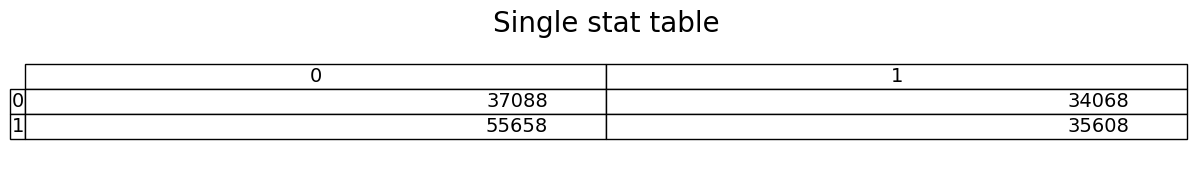

In [14]:
# simple plot

plot_single_stat(various.best_value.max)

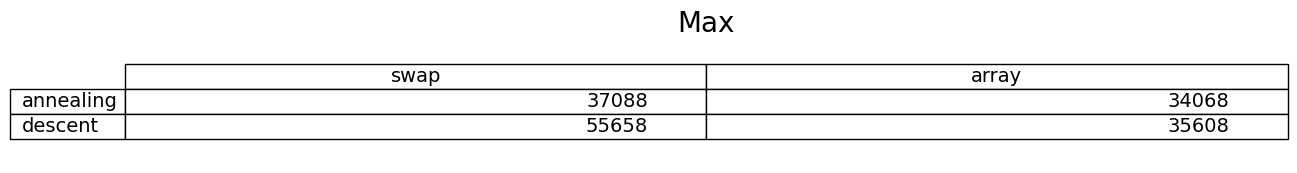

In [15]:
# cleaner plot

plot_single_stat(various.best_value.max, 'Max', ['annealing', 'descent'], ['swap', 'array'])

### Plotting the data from a single run

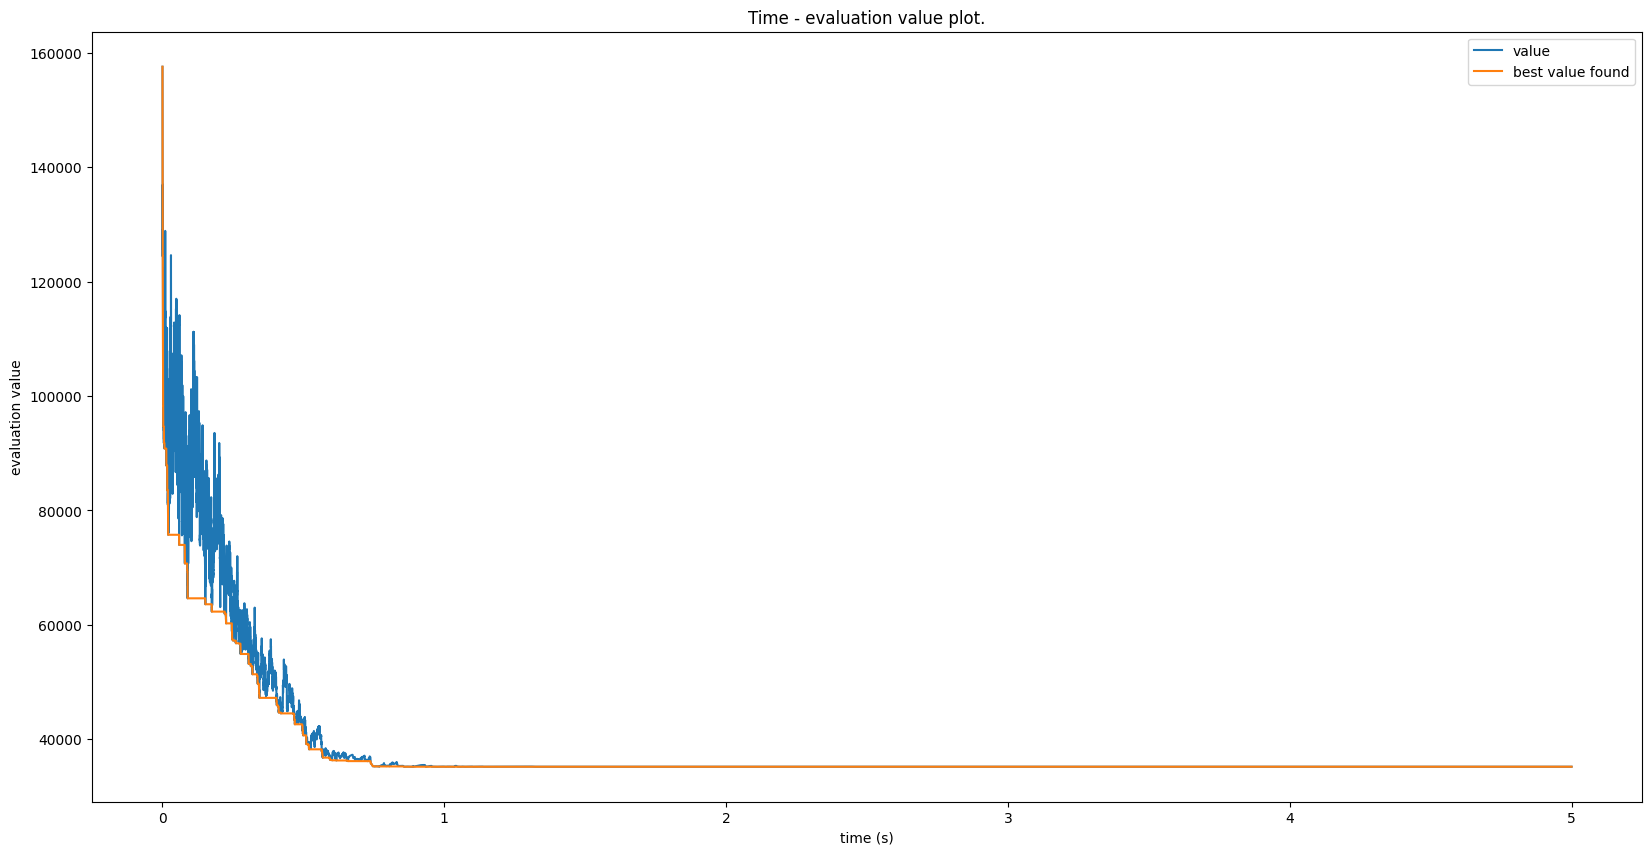

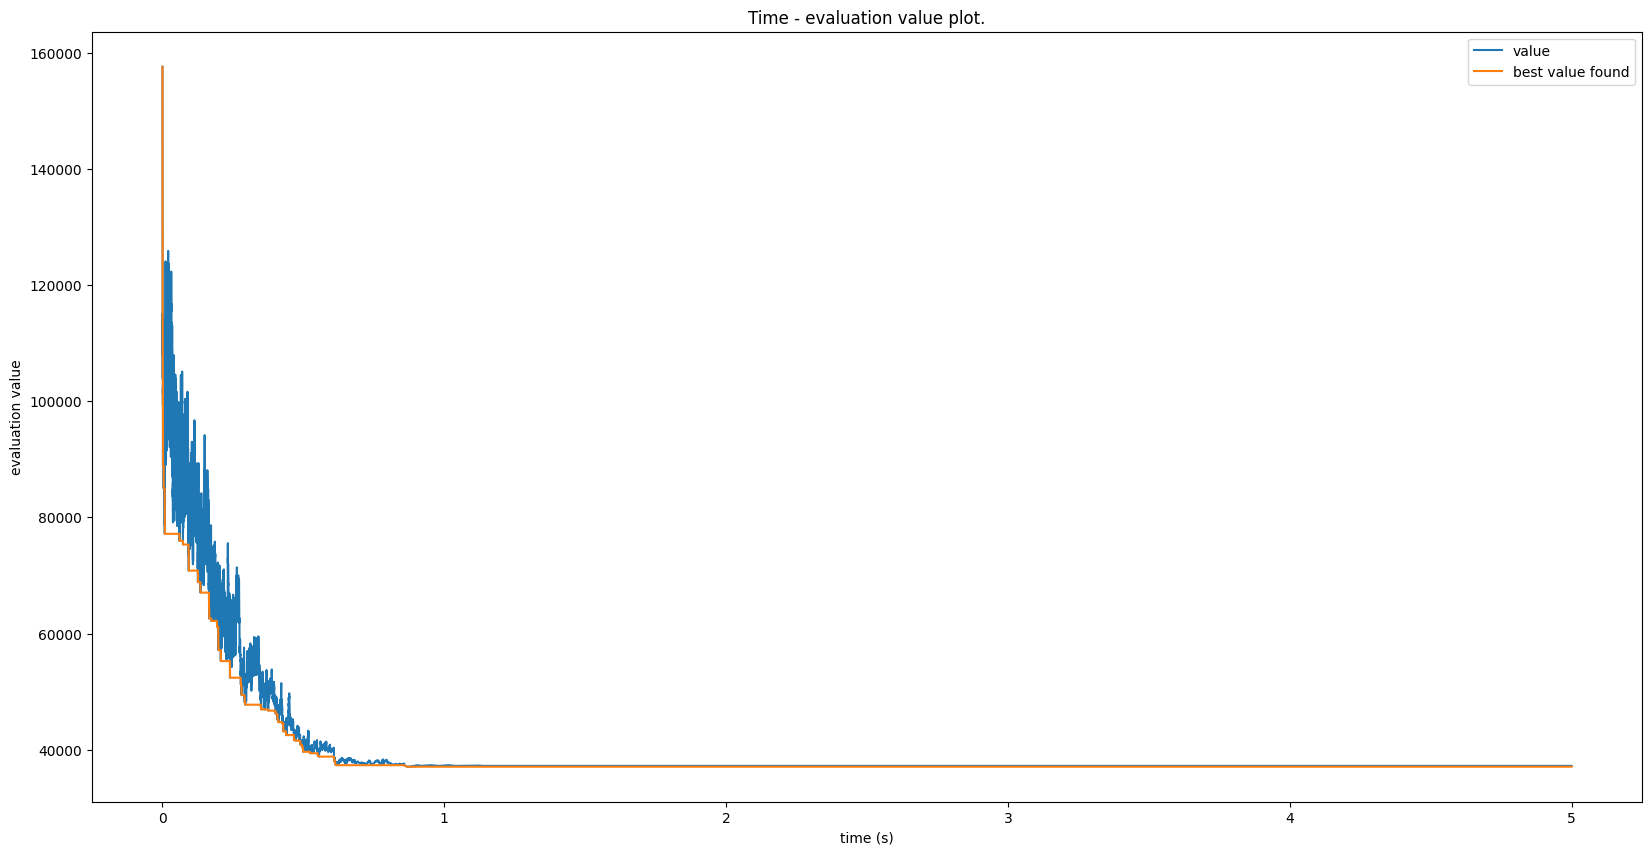

In [16]:
# annealing swap

for i in result[0][0]:
    plot(i.data)

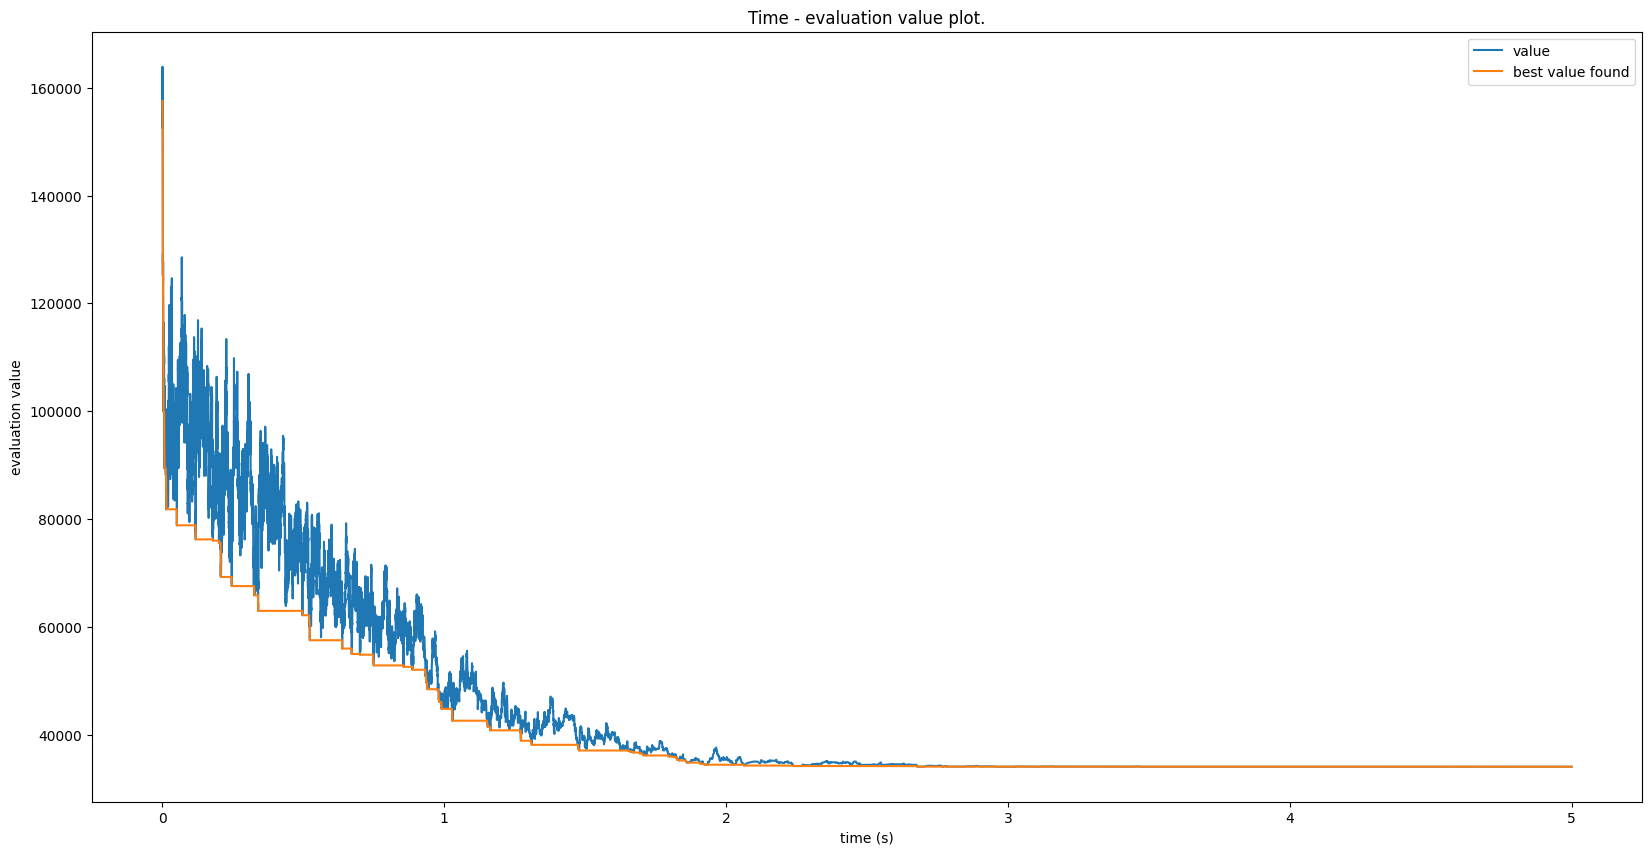

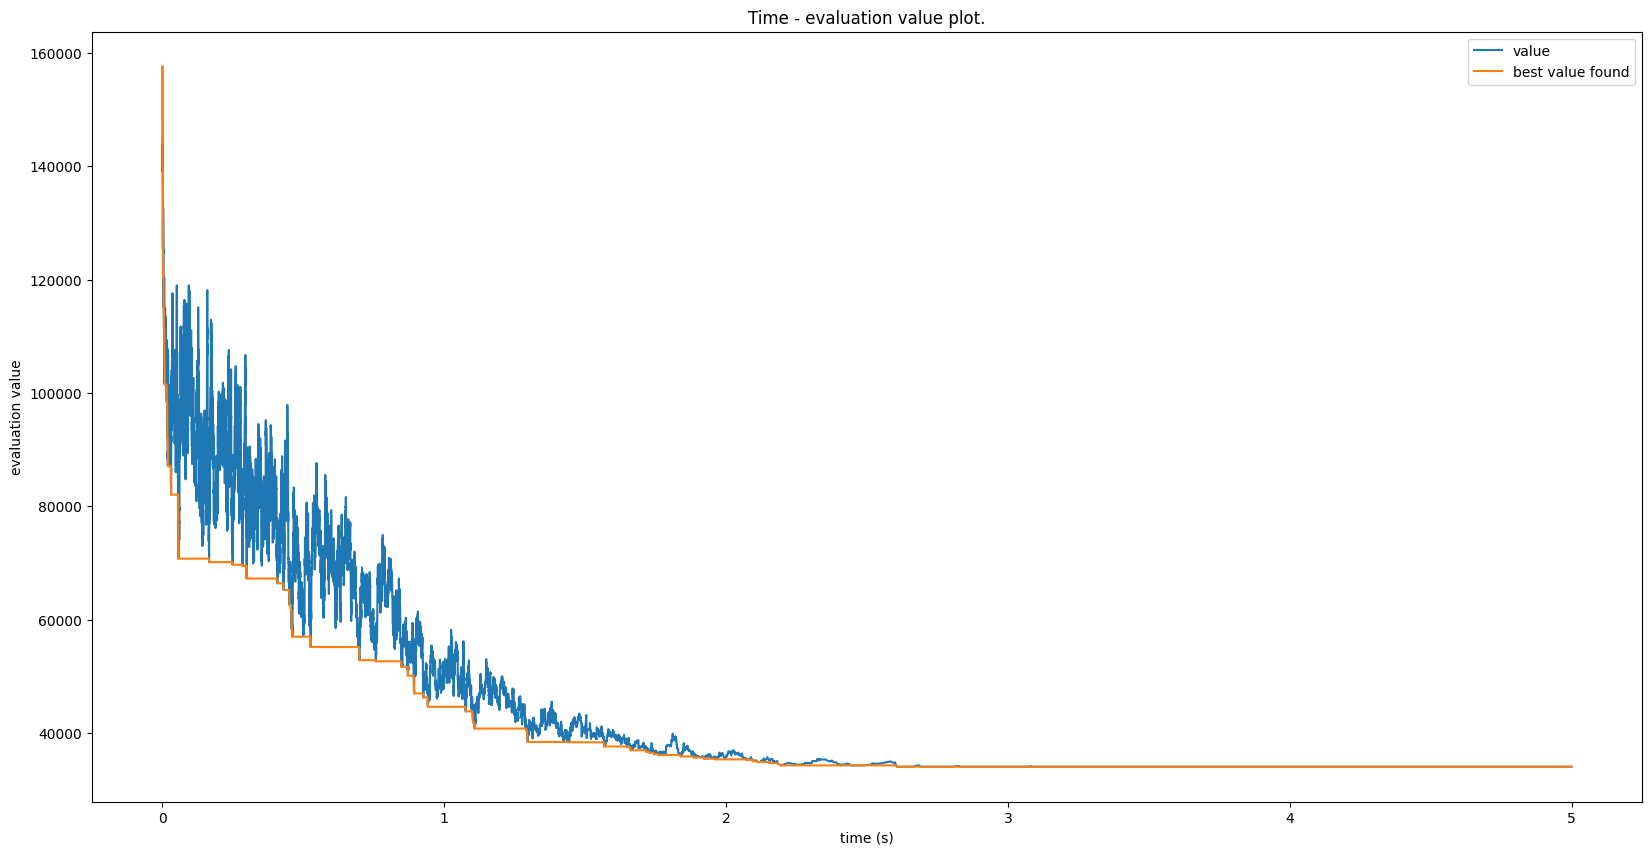

In [17]:
# annealing reverse
for i in result[0][1]:
    plot(i.data)

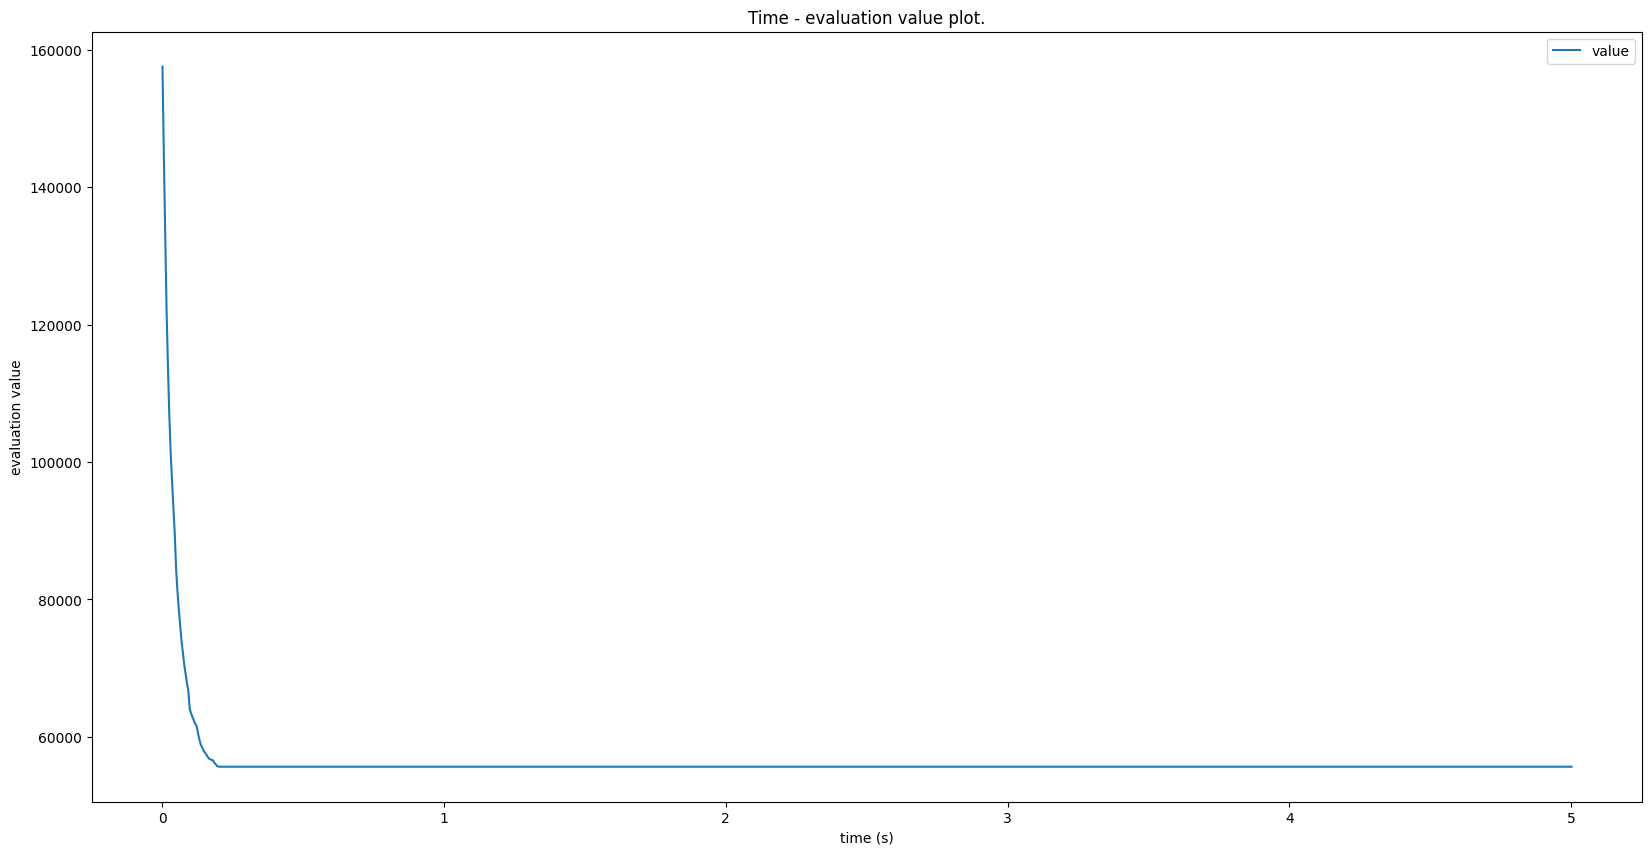

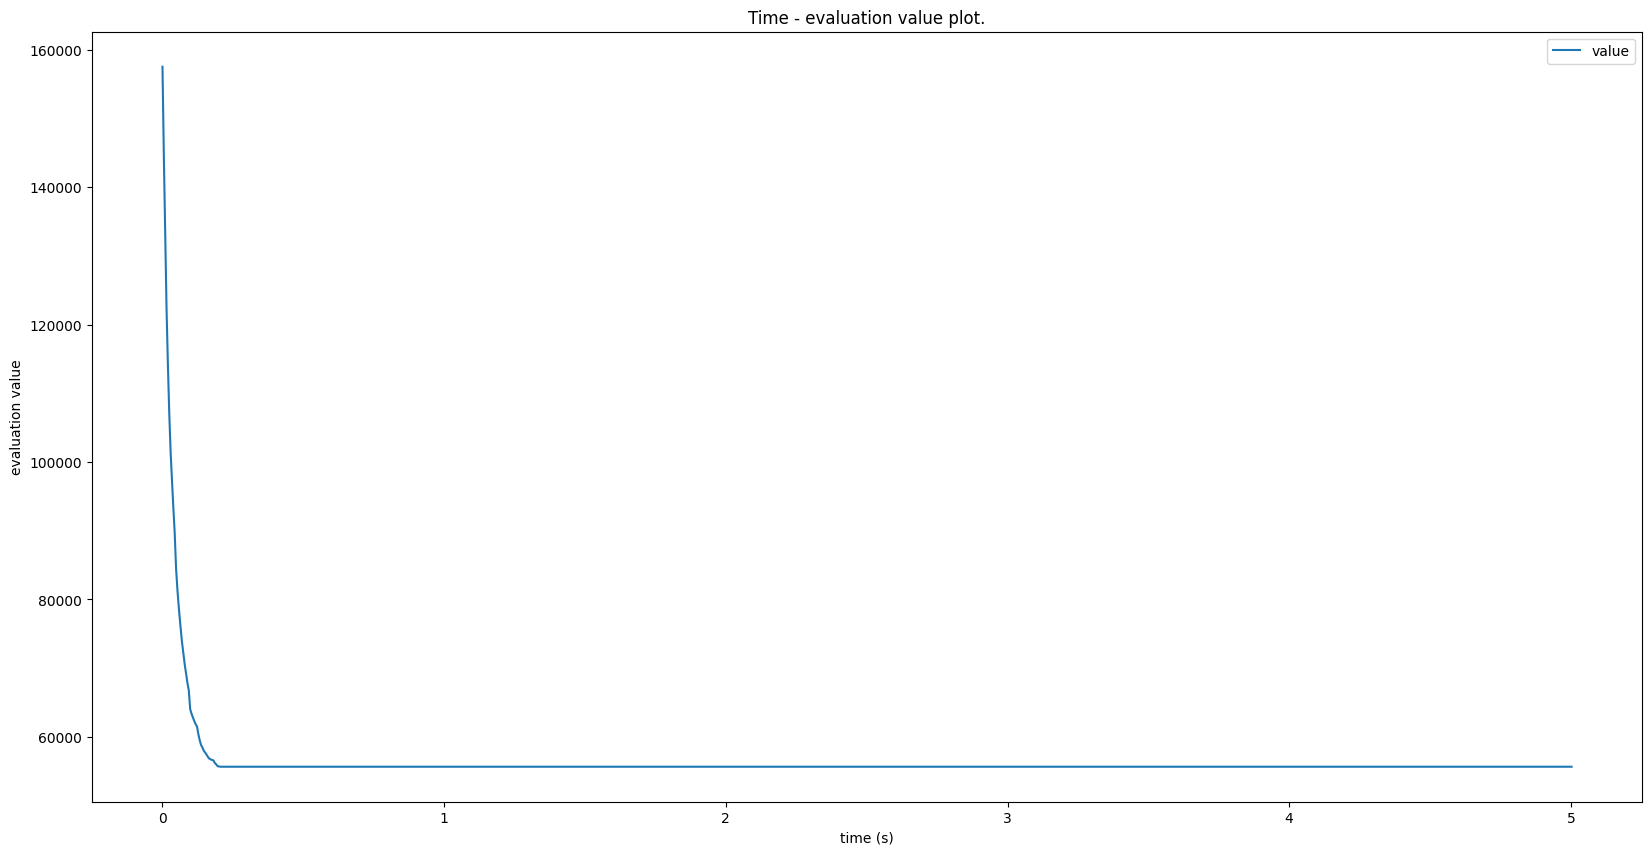

In [18]:
# descent swap(run 0, 1 and 2 should be almost identical)
for i in result[1][0]:
    plot(i.data)

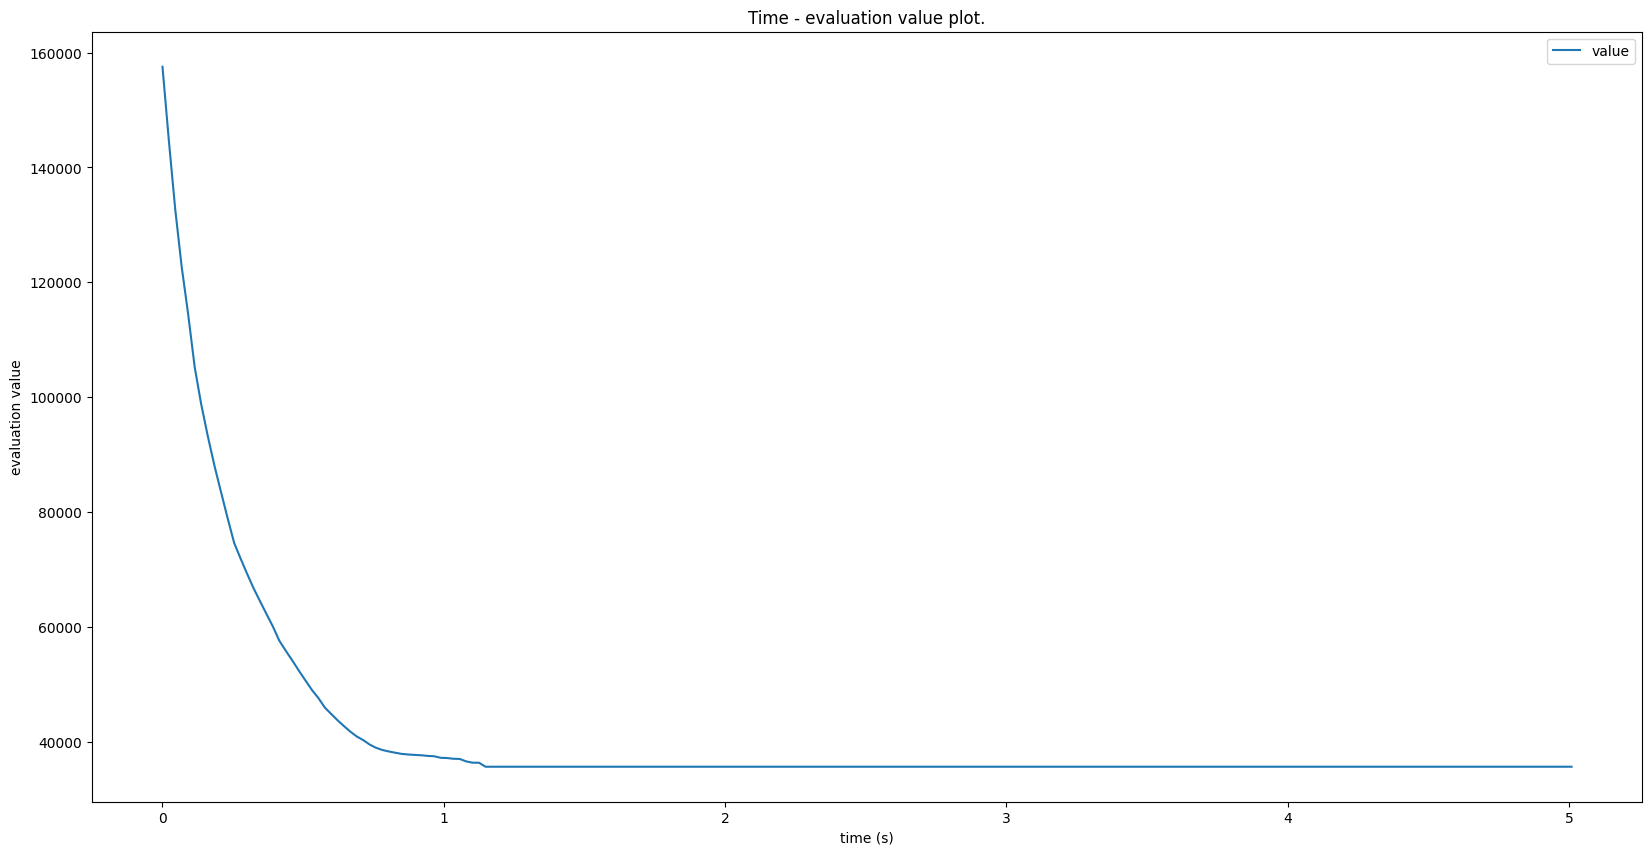

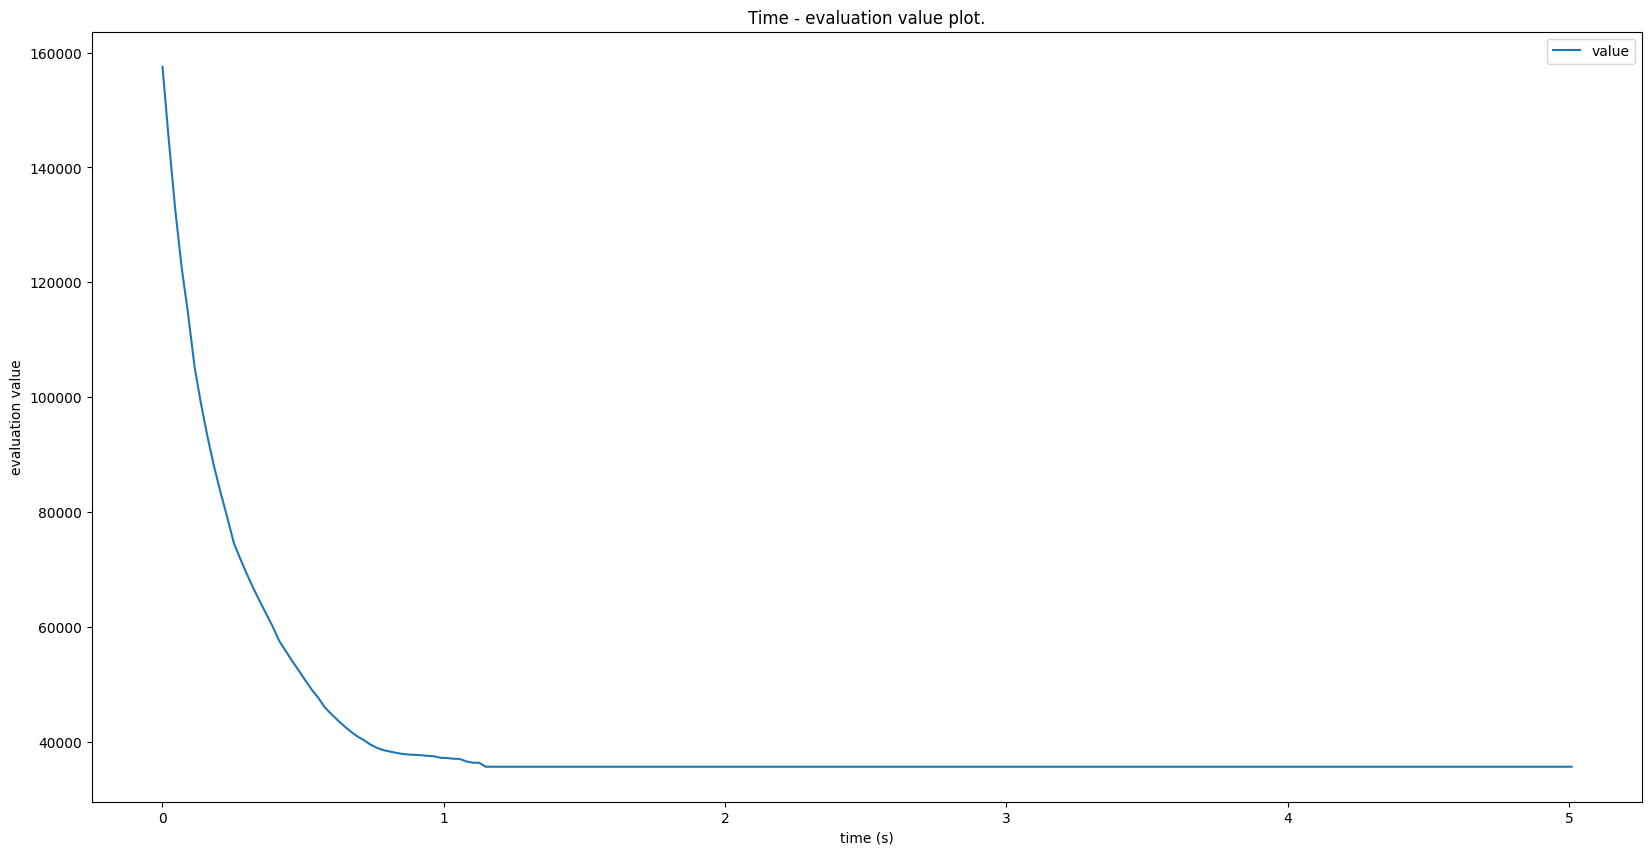

In [19]:
# descent reverse(run 0, 1 and 2 should be almost identical)
for i in result[1][1]:
    plot(i.data)